<a href="https://colab.research.google.com/github/Felixwkk/image_classification/blob/master/retrain_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the files  from GITHUB

In [1]:
! git clone https://github.com/tensorflow/models.git
#!git clone https://github.com/hardikvasa/google-images-download.git
! git clone https://github.com/Joeclinton1/google-images-download.git

Cloning into 'models'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 34385 (delta 7), reused 10 (delta 3), pack-reused 34344
Receiving objects: 100% (34385/34385), 512.47 MiB | 34.05 MiB/s, done.
Resolving deltas: 100% (22172/22172), done.
Checking out files: 100% (2497/2497), done.
Cloning into 'google-images-download'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 625 (delta 0), reused 3 (delta 0), pack-reused 621
Receiving objects: 100% (625/625), 275.83 KiB | 1.13 MiB/s, done.
Resolving deltas: 100% (362/362), done.


Prepare the google image download to support python 3

In [2]:
%cd /content/google-images-download
! wget https://files.pythonhosted.org/packages/ed/9c/9030520bf6ff0b4c98988448a93c04fcbd5b13cd9520074d8ed53569ccfe/selenium-3.141.0.tar.gz

/content/google-images-download
--2020-05-03 00:13:03--  https://files.pythonhosted.org/packages/ed/9c/9030520bf6ff0b4c98988448a93c04fcbd5b13cd9520074d8ed53569ccfe/selenium-3.141.0.tar.gz
Resolving files.pythonhosted.org (files.pythonhosted.org)... 151.101.1.63, 151.101.65.63, 151.101.129.63, ...
Connecting to files.pythonhosted.org (files.pythonhosted.org)|151.101.1.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 854669 (835K) [binary/octet-stream]
Saving to: ‘selenium-3.141.0.tar.gz’

selenium-3.141.0.ta 100%[===================>] 834.64K  --.-KB/s    in 0.008s  

2020-05-03 00:13:03 (98.8 MB/s) - ‘selenium-3.141.0.tar.gz’ saved [854669/854669]



In [0]:
!tar xf  /content/google-images-download/selenium-3.141.0.tar.gz

In [4]:
%cd /content/google-images-download/selenium-3.141.0
!python3 setup.py install

/content/google-images-download/selenium-3.141.0
running install
running bdist_egg
running egg_info
writing selenium.egg-info/PKG-INFO
writing dependency_links to selenium.egg-info/dependency_links.txt
writing requirements to selenium.egg-info/requires.txt
writing top-level names to selenium.egg-info/top_level.txt
reading manifest file 'selenium.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'selenium.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/selenium
copying selenium/__init__.py -> build/lib/selenium
creating build/lib/selenium/common
copying selenium/common/__init__.py -> build/lib/selenium/common
copying selenium/common/exceptions.py -> build/lib/selenium/common
creating build/lib/selenium/webdriver
copying selenium/webdriver/__init__.py -> build/lib/selenium/webdriver
creating build/lib/selenium/webdriver/android
copying 

Setting the environment to support the files

In [5]:
%cd /content/models/research/
! protoc object_detection/protos/*.proto --python_out=.
! export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim
%set_env PYTHONPATH=/content/models/research/object_detection/
%set_env PYTHONPATH=/content/models/research/


/content/models/research
env: PYTHONPATH=/content/models/research/object_detection/
env: PYTHONPATH=/content/models/research/


In [0]:
import sys
import os
sys.path.append('/content/models/research/object_detection/')
sys.path.append('/content/models/research/')
sys.path.append("/usr/local/lib/python3.6/dist-packages/tensorflow/contrib/slim")
sys.path.append('/content/google-images-download/')
sys.path.append('content/google-images-download/selenium-3.141.0/')
os.environ['PYTHONPATH']=os.environ['PYTHONPATH']+':/content/models/research/slim'

Use Tensorflow GPU to train faster than CPU. Seems that only this version works with Google Colab

In [7]:
!pip install tensorflow-gpu==1.15.2
import tensorflow as tf
print(tf.__version__)


     |████████████████████████████████| 411.0MB 44kB/s 
     |████████████████████████████████| 3.8MB 40.7MB/s 
     |████████████████████████████████| 512kB 50.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=7474127bd3eb216dc5814b28084ee1e2cfa5d3fb4973baf696c111f10012f188
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninsta

Test the code is working with the environment setup.

In [8]:
%cd /content/models/research
! python object_detection/builders/model_builder_test.py

/content/models/research
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_f

Create directories for retraining the model

In [0]:

os.mkdir('/content/models/annotations')
os.mkdir('/content/models/images')
os.mkdir('/content/models/checkpoints')
os.mkdir('/content/models/tf_record')
#os.mkdir('/content/models/reasearch')
os.mkdir('/content/models/annotations/xmls')


Download CHromedriver 

In [10]:
%cd /content/google-images-download
! wget https://chromedriver.storage.googleapis.com/81.0.4044.69/chromedriver_mac64.zip

/content/google-images-download
--2020-05-03 00:14:39--  https://chromedriver.storage.googleapis.com/81.0.4044.69/chromedriver_mac64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 172.217.14.80, 2607:f8b0:4007:803::2010
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|172.217.14.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7019279 (6.7M) [application/zip]
Saving to: ‘chromedriver_mac64.zip’

chromedriver_mac64. 100%[===================>]   6.69M  --.-KB/s    in 0.05s   

2020-05-03 00:14:39 (135 MB/s) - ‘chromedriver_mac64.zip’ saved [7019279/7019279]



In [11]:

!unzip chromedriver_mac64.zip

Archive:  chromedriver_mac64.zip
  inflating: chromedriver            


download images from google search if images are not in google drive.
Image count is 70. Can be changed up to 200.
'Corgi' is used to train the model.

In [12]:
sys.path.append('/content/google_images_download')
%set_env PYTHONPATH=/content/google_images_download/

from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation
image_count = 100
arguments = {"keywords":"corgi","limit":image_count,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images

env: PYTHONPATH=/content/google_images_download/

Item no.: 1 --> Item name = corgi
Evaluating...
Starting Download...
Image URL: https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/25201637/day_2_dec_14_085.jpg
Completed Image ====> 1.day_2_dec_14_085.jpg
Image URL: https://upload.wikimedia.org/wikipedia/commons/f/fb/Welchcorgipembroke.JPG
Invalid or missing image format. Skipping...
Image URL: https://upload.wikimedia.org/wikipedia/commons/2/2b/WelshCorgi.jpeg
Completed Image ====> 2.WelshCorgi.jpeg
Image URL: https://cdn1-www.dogtime.com/assets/uploads/gallery/pembroke-welsh-corgi-dog-breed-pictures/prance-8.jpg
Completed Image ====> 3.prance-8.jpg
Image URL: https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/29172137/Pembroke-Welsh-Corgi-puppy.jpg
Completed Image ====> 4.Pembroke-Welsh-Corgi-puppy.jpg
Image URL: https://images-na.ssl-images-amazon.com/images/I/715VUc4IDCL.jpg
Completed Image ====> 5.715VUc4IDCL.jpg
Image URL: https://c

In [0]:
# rename files to be numeric filename for training the model
path = '/content/google-images-download/downloads/corgi/'
counter = 1
for f in os.listdir(path):
    suffix = f.split('.')[-1]
    if suffix == 'jpg' or suffix == 'png':
        new = '{}.{}'.format(str(counter), suffix)
        os.rename(path +f, path + new)
        counter = int(counter) + 1

In [0]:
# upload images from Colab to Google Drive for storage
from shutil import copyfile
for x in os.listdir('/content/google-images-download/downloads/corgi'):
  copyfile('/content/google-images-download/downloads/corgi/'+x, '/content/drive/My Drive/Colab Notebooks/image_retrainssd/images/'+x)

Setup the link with Google Drive

In [0]:
# copy images from google drive
from google.colab import drive
drive.mount('/content/drive')

In [0]:
image_count=140

transfer image files to google drive for storage

In [0]:
from shutil import copyfile
# copy image files from google drive to ./models/images
for x in os.listdir('/content/drive/My Drive/Colab Notebooks/image_retrainssd/images'):
 copyfile('/content/drive/My Drive/Colab Notebooks/image_retrainssd/images/'+x , '/content/models/images/'+x)

Creaing the label_map.pbtxt file to identify 'corgi' image

In [0]:
f= open("/content/models/annotations/label_map.pbtxt","w+")
#f= open("/content/models/research/object_detection/data/label_map.pbtxt","w+")
f.write("item { \r\n id: 1 \r\n name: 'corgi' }")
f.close() 

Creating the trainval.txt to list the number of images to be trained. Image_count contained the number of image files

In [0]:
f= open("/content/models/annotations/trainval.txt","w+")
for i in range(image_count):
     f.write("%d\r\n" % (i+1))
f.close() 

Download the correct create_tf_record.py file for creating the train and val files

In [21]:
os.chdir('/content/models/research/object_detection/dataset_tools')
! wget https://raw.githubusercontent.com/thatbrguy/Pedestrian-Detection/master/create_tf_record.py
#%mv /content/models/research/object_detection/dataset_tools/create_pet_tf_record.py.1 create_tf_record.py

--2020-05-03 00:25:01--  https://raw.githubusercontent.com/thatbrguy/Pedestrian-Detection/master/create_tf_record.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6823 (6.7K) [text/plain]
Saving to: ‘create_tf_record.py’

create_tf_record.py 100%[===================>]   6.66K  --.-KB/s    in 0s      

2020-05-03 00:25:02 (86.5 MB/s) - ‘create_tf_record.py’ saved [6823/6823]



In [0]:
# setup the path here the google drive storage directory

image_path = '/content/drive/My Drive/Colab Notebooks/image_retrainssd/'

copy files from the google download directory to the training model directory

In [23]:
%cd /content/google-images-download/downloads/corgi/

for x in os.listdir('/content/google-images-download/downloads/corgi'):
  os.rename(x, '/content/models/images/'+x)
  

/content/google-images-download/downloads/corgi


Download the XML created using IMagelbl from google drive

In [43]:

%cd /content/drive/My Drive/Colab Notebooks/image_retrainssd/xml
for x in os.listdir('/content/drive/My Drive/Colab Notebooks/image_retrainssd/xml'):
  if x.split('.')[-1] == 'xml':
    copyfile(x, '/content/models/annotations/xmls/'+x)

%cd /content

/content/drive/My Drive/Colab Notebooks/image_retrainssd/xml
/content


XML files contain incorrect paths need to replace them with the right paths in the colab here by replacing the paths in the file

In [0]:
for x in os.listdir('/content/models/annotations/xmls'):
  if x.split('.')[-1] == 'xml':
    fin = open('/content/models/annotations/xmls/'+x, 'rt')
    data = fin.read()
    data = data.replace('/Users/admin/Downloads/', '/content/models/images/')
    fin.close()

    fin = open('/content/models/annotations/xmls/'+x, 'wt')
    fin.write(data)
    fin.close()



In [0]:
#renaming file extension in the xml files  from jpg to png to support the script

In [0]:
for x in os.listdir('/content/models/annotations/xmls'):
  if x.split('.')[-1] == 'xml':
    fin = open('/content/models/annotations/xmls/'+x, 'rt')
    data = fin.read()
    data = data.replace('jpg', 'png')
    fin.close()

    fin = open('/content/models/annotations/xmls/'+x, 'wt')
    fin.write(data)
    fin.close()



copy the images from jpg to png

In [0]:
os.mkdir('/content/models/annotations/trimaps')
for  x in os.listdir('/content/models/images'):
  copyfile('/content/models/images/'+x, '/content/models/annotations/trimaps/'+x.split('.')[0]+'.png')
  

In [0]:
for x in os.listdir('/content/models/images'):
  if x.split('.')[-1] == 'jpg':
    copyfile('/content/models/images/'+x , '/content/models/images/'+x.split('.')[0]+'.png')

create the relevant  files to prepare for training

In [47]:
# From the models directory
import os
os.chdir('/content/models')
sys.path.append('/content/models/research/object_detection')
#sys.path.append('/content/models/annotations')
!export PYTHONPATH='$PYTHONPATH:/content/models/annotations'
%set_env PYTHONPATH=/content/models/research:/content/models:/content/models/research/object_detection
!PATH=”$PATH:/content/models”
!python research/object_detection/dataset_tools/create_tf_record.py  --label_map_path=/content/models/annotations/label_map.pbtxt --output_dir=/content/models/tf_record --data_dir=/content/models 

env: PYTHONPATH=/content/models/research:/content/models:/content/models/research/object_detection


W0503 01:25:06.112476 139938190534528 module_wrapper.py:139] From /content/models/research/object_detection/utils/label_map_util.py:138: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

I0503 01:25:06.113358 139938190534528 create_tf_record.py:153] Reading from Pet dataset.
I0503 01:25:06.113993 139938190534528 create_tf_record.py:168] 133 training and 7 validation examples.

W0503 01:25:06.114135 139938190534528 module_wrapper.py:139] From research/object_detection/dataset_tools/create_tf_record.py:131: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.

I0503 01:25:06.114547 139938190534528 create_tf_record.py:134] On image 0 of 133
/content/models/research/object_detection/utils/dataset_util.py:79: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not N

downlod the ssd_mobilenet zip file from google drive

In [30]:
copyfile('/content/drive/My Drive/Colab Notebooks/image_retrainssd/ssd_mobilenet_v2_coco.config', '/content/models/ssd_mobilenet_v2_coco.config')

'/content/models/ssd_mobilenet_v2_coco.config'

Create the directories for the train and val records generated from the above command

In [48]:
%cd /content/models
%mv /content/models/train.record /content/models/tf_record
%mv /content/models/val.record /content/models/tf_record

/content
mv: cannot stat '/content/models/val.record': No such file or directory


download the tar file for ssd_mobilenet

In [32]:
%cd /content
! wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz

/content
--2020-05-03 00:27:26--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.14.112, 2607:f8b0:4007:80c::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.14.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M   141MB/s    in 1.3s    

2020-05-03 00:27:27 (141 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]



In [0]:
! tar -xf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

Move the files to the correct directories

In [34]:
%cd /content/ssd_mobilenet_v2_coco_2018_03_29
%mv model.ckpt.meta /content/models/checkpoints/
%mv model.ckpt.index /content/models/checkpoints/
%mv model.ckpt.data-00000-of-00001 /content/models/checkpoints/

/content/ssd_mobilenet_v2_coco_2018_03_29


Create directories for train and eval

In [35]:
# Change into the models directory
%cd /content/models
# Make directory for storing training progress
%mkdir train
# Make directory for storing validation results
%mkdir eval


/content/models


Train the model

In [49]:
%cd /content/models
%set_env PYTHONPATH=$PYTHONPATH:/content/models/research/slim:/content/models/research
# Begin training
! python research/object_detection/legacy/train.py \
    --logtostderr \
    --train_dir=train \
    --pipeline_config_path=ssd_mobilenet_v2_coco.config

/content
env: PYTHONPATH=$PYTHONPATH:/content/models/research/slim:/content/models/research
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Instructions for updating:
Use object_detection/model_main.py.
W0503 01:26:28.505170 140519389960064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.

W0503 01:26:28.505403 140519389960064 module_wrapper.py:139] From research/object_detection/legacy/train.py:91: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0503 01:26:28.505681 

test the model with evaluation datasets

In [0]:
# From the models directory
! python research/object_detection/legacy/eval.py \
    --logtostderr \
    --pipeline_config_path=ssd_mobilenet_v2_coco.config \
    --checkpoint_dir=train \
    --eval_dir=eval


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Instructions for updating:
Use object_detection/model_main.py.
W0428 13:56:19.293940 140223418267520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.

W0428 13:56:19.294136 140223418267520 module_wrapper.py:139] From research/object_detection/legacy/eval.py:88: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0428 13:56:19.294440 140223418267520 module_wrapper.py:139] From /content/models/research/object_detection/utils/c

In [37]:
# From the models directory
! tensorboard --logdir=./ 

TensorBoard 1.15.0 at http://0093164bb865:6006/ (Press CTRL+C to quit)
^C


create the model. Go to to the train directory to take the latest checkpoint number to replace the model.ckpt here.

In [50]:
# note teh checkpoint number in /content/models/train sub directory
# From the models directory
%mkdir fine_tuned_model
%cd /content/models

!python research/object_detection/export_inference_graph.py  --input_type image_tensor  --pipeline_config_path ssd_mobilenet_v2_coco.config --trained_checkpoint_prefix  train/model.ckpt-4937   --output_directory fine_tuned_model

mkdir: cannot create directory ‘fine_tuned_model’: File exists
/content
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0503 01:53:40.750394 139712260958080 module_wrapper.py:139] From research/object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0503 01:53:40.757899 139712260958080 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0503 01:53:40.758212 139712260958080 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:121: The name tf.placeholder i

In [0]:
!ls

annotations
AUTHORS
checkpoints
CODEOWNERS
CONTRIBUTING.md
eval
images
ISSUES.md
ISSUE_TEMPLATE.md
LICENSE
official
README.md
research
ssd_mobilenet_v2_coco.config
tf_record
train
traincheckpoint
trainevents.out.tfevents.1587305748.0211dd21a942
traingraph.pbtxt
trainmodel.ckpt-132.data-00000-of-00001
trainmodel.ckpt-132.index
trainmodel.ckpt-132.meta
trainmodel.ckpt-165.data-00000-of-00001
trainmodel.ckpt-165.index
trainmodel.ckpt-165.meta
trainmodel.ckpt-32.data-00000-of-00001
trainmodel.ckpt-32.index
trainmodel.ckpt-32.meta
trainmodel.ckpt-65.data-00000-of-00001
trainmodel.ckpt-65.index
trainmodel.ckpt-65.meta
trainmodel.ckpt-99.data-00000-of-00001
trainmodel.ckpt-99.index
trainmodel.ckpt-99.meta
trainpipeline.config
WORKSPACE


testing the model using an image from google drive

In [51]:
# Import packages
%cd /content/models
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'fine_tuned_model'
IMAGE_NAME = '/content/images.jpg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'annotations','label_map.pbtxt')

# Path to image
PATH_TO_IMAGE = IMAGE_NAME #os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 1

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

/content


In [0]:
# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

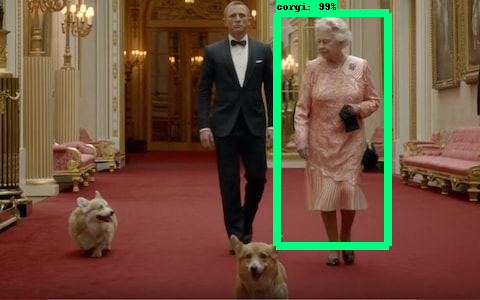

In [54]:

# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.80)

# All the results have been drawn on image. Now display the image.
cv2_imshow( image)

# Press any key to close the image
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()


The following several scripts is to copy the train files and checkpoints to google drive

In [0]:
%cd /content/models/train
#copy checkpoint train files to google drive for storage
for x in os.listdir('/content/models/train'):
  copyfile('/content/models/train/'+x, '/content/drive/My Drive/Colab Notebooks/image_retrainssd/checkpoints/'+x)

/content/models/train


In [0]:
%cd /content/models/eval
#copy checkpoint train files to google drive for storage
for x in os.listdir('/content/models/eval'):
  copyfile('/content/models/eval/'+x, '/content/drive/My Drive/Colab Notebooks/image_retrainssd/eval_checkpoints/'+x)

In [0]:
# copy checkpoint train files from google drive to TRAIN subdirectory
for x in os.listdir('/content/drive/My Drive/Colab Notebooks/image_retrainssd/checkpoints'):
  copyfile('/content/drive/My Drive/Colab Notebooks/image_retrainssd/checkpoints/'+x, '/content/models/train/'+x)

In [0]:
%cd /content/models/fine_tuned_model
# copy fine tune model  files togoogle drive to model/fine tunesubdirectory
for x in os.listdir('/content/models/fine_tuned_model'):
  if os.path.isfile(x) == True :
    print(x)
    copyfile('/content/models/fine_tuned_model/'+x, '/content/drive/My Drive/Colab Notebooks/image_retrainssd/fine_tune_model/'+x)

/content/models/fine_tuned_model
model.ckpt.meta
model.ckpt.data-00000-of-00001
frozen_inference_graph.pb
model.ckpt.index
checkpoint
pipeline.config


In [0]:
%cd /content/models/fine_tuned_model/saved_model
# copy fine tune model  files togoogle drive to model/fine tunesubdirectory
for x in os.listdir('/content/models/fine_tuned_model/saved_model'):
  if os.path.isfile(x) == True :
    copyfile('/content/models/fine_tuned_model/saved_model/'+x, '/content/drive/My Drive/Colab Notebooks/image_retrainssd/fine_tune_model/saved_model/'+x)

/content/models/fine_tuned_model/saved_model


In [0]:
from shutil import copyfile
%cd /content/models
%mkdir fine_tuned_model
%cd fine_tuned_model
%mkdir saved_model


In [0]:
%cd /content/drive/My Drive/Colab Notebooks/image_retrainssd/fine_tune_model
# transfering trained model files from google drive to colab
for x in os.listdir('/content/drive/My Drive/Colab Notebooks/image_retrainssd/fine_tune_model'):
  print(x)
  if os.path.isfile(x) == True :
    copyfile('/content/drive/My Drive/Colab Notebooks/image_retrainssd/fine_tune_model/'+x, '/content/models/fine_tuned_model/'+x)

/content/drive/My Drive/Colab Notebooks/image_retrainssd/fine_tune_model
saved_model
model.ckpt.meta
model.ckpt.data-00000-of-00001
frozen_inference_graph.pb
pipeline.config
model.ckpt.index
checkpoint


In [0]:
  copyfile('/content/drive/My Drive/Colab Notebooks/image_retrainssd/fine_tune_model/saved_model/saved_model.pb', '/content/models/fine_tuned_model/saved_model/saved_model.pb')

'/content/models/fine_tuned_model/saved_model/saved_model.pb'